# ***SMOKE & FIRE CLASSIFICATION***

Dataset link : https://www.kaggle.com/kutaykutlu/forest-fire

pretrained model : https://drive.google.com/file/d/1-6W-_vuysz6yQH6l7TB40ZAMG0St7fM_/view?usp=sharing

## Import libraries

In [ ]:
import os
import shutil
import warnings

## Remove Warnings

In [ ]:
warnings.filterwarnings("ignore")

# Prepare Data

In [ ]:
os.mkdir("Smoke and Fire Dataset")
shutil.move("/content/train_fire","/content/Smoke and Fire Dataset/Fire")
shutil.move("/content/train-smoke","/content/Smoke and Fire Dataset/Smoke")

'/content/Smoke and Fire Dataset/Smoke'

In [ ]:
shutil.rmtree("/content/test_big")
shutil.rmtree("/content/test_small")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.4.1'

# Data Preprocessing (Data Augmentation)

In [ ]:
train_path = "/content/Smoke and Fire Dataset"

In [ ]:
train_dg = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True,
                              shear_range=0.2, zoom_range=0.2,
                              width_shift_range=0.2, height_shift_range=0.2, validation_split=0.1)


In [ ]:
train = train_dg.flow_from_directory(train_path, target_size = (224,224), color_mode="rgb", class_mode = "binary", batch_size=batch_size, subset="training" )

val = train_dg.flow_from_directory(train_path, target_size = (224,224), color_mode="rgb", class_mode = "binary", batch_size=batch_size, subset="validation" )

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


In [ ]:
train.class_indices

{'Fire': 0, 'Smoke': 1}

In [ ]:
val.class_indices

{'Fire': 0, 'Smoke': 1}

# Implement Our own CNN Architecture

In [ ]:
import tensorflow as tf

In [ ]:

cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Summary of model

In [ ]:
cnn.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 56, 56, 256)       147712    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 28, 28, 256)       0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 200704)          

# Compile model

In [ ]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

## Train a model

In [ ]:
cnn.fit_generator(train,validation_data=val,epochs=2,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=val.samples//batch_size, 
                 )

Epoch 1/2
772/772 [==============================] - 419s 542ms/step - loss: 0.1412 - accuracy: 0.9631 - val_loss: 0.4722 - val_accuracy: 0.9368
Epoch 2/2
772/772 [==============================] - 418s 542ms/step - loss: 0.0982 - accuracy: 0.9671 - val_loss: 0.0163 - val_accuracy: 0.9934


## Evaluate

In [ ]:
score = cnn.evaluate(val)
print('Test accuracy:', score[1])

86/86 [==============================] - 40s 465ms/step - loss: 0.0189 - accuracy: 0.9927
Test accuracy: 0.9927166700363159


## Save a model

In [ ]:
cnn.save("/content/Smoke_and_Fire_Classifier.h5")
cnn.save("/content/drive/MyDrive/Smoke_and_Fire_Classifier.h5")

# Load a model

In [ ]:
my_model = load_model("/content/Smoke_and_Fire_Classifier.h5")

## Test a model

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [ ]:
def test_model(image_for_testing):
  test_image=image.load_img(image_for_testing,target_size=(224,224))
  test_image=image.img_to_array(test_image)
  test_image=test_image/255
  test_image=np.expand_dims(test_image,axis=0)
  result=my_model.predict_classes(test_image)

  Catagories=['Fire','Smoke']

  image_show=PIL.Image.open(image_for_testing)
  plt.imshow(image_show)

  plt.title(Catagories[int(result[0][0])])
  plt.axis("off")
  plt.show()

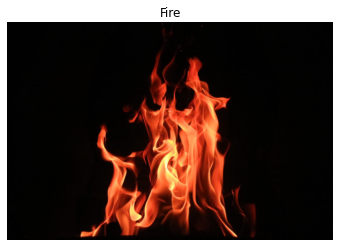

In [ ]:
test_model('/content/fire_test.jpg')

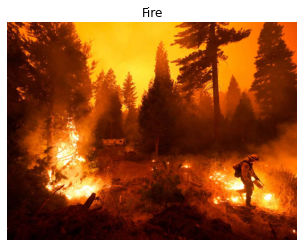

In [ ]:
test_model('/content/fire_test1.jpg')

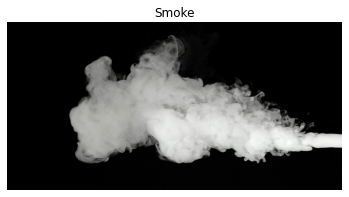

In [ ]:
test_model('/content/smoke_test.jpg')

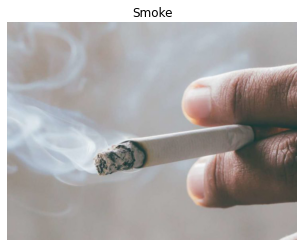

In [ ]:
test_model('/content/smoke_test1.jpg')

# ***THANK YOU !!!!!!!!!!!!!!***